In [ ]:
# install a library
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import arange

In [ ]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    #'Navistar':'NAV',#Navistar fue adquirida por Traton así que se desestimó su uso en este trabajo. 
    #Fuente: https://finance.yahoo.com/news/company-acquired-navistar-saw-sharp-035900178.html
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'Symantec':'SYM.SG',#Cambiado el simbolo SYMC por el actual SYM.SG
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Mitsubishi':'8058.T',#Cambiado el simbolo MSBHY por el actual 8058.T
    'Sony':'SONY',#Cambiado el simbolo SNE por el actual SONY
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

In [ ]:
df = yf.download(list(companies_dict.values()), start="2015-01-01", end="2017-12-31")
df

[*********************100%***********************]  27 of 27 completed


Adj Close                                               \
                 8058.T       AAPL       AMZN        AXP          BA   
Date                                                                   
2015-01-02          NaN  24.603207  15.426000  82.486214  113.657219   
2015-01-05  1619.707275  23.910091  15.109500  80.304794  112.870056   
2015-01-06  1552.758911  23.912346  14.764500  78.593346  111.540627   
2015-01-07  1542.771973  24.247652  14.921000  80.309837  113.272377   
2015-01-08  1540.552734  25.179298  15.023000  81.448250  115.275261   
...                 ...        ...        ...        ...         ...   
2017-12-25  2476.978271        NaN        NaN        NaN         NaN   
2017-12-26  2467.274414  40.548737  58.838001  91.797218  281.475952   
2017-12-27  2526.307617  40.555870  59.112999  92.318741  281.723755   
2017-12-28  2506.899658  40.669987  59.305000  92.849564  282.419464   
2017-12-29  2517.412109  40.230179  58.473499  92.486366  281.047150   

                                                                     ...  \
                  BAC         CVX          F          GE        HMC  ...   
Date                                                                 ...   
2015-01-02  15.366432   79.639999  10.830516  167.345596  29.590000  ...   
2015-01-05  14.920033   76.456657  10.407448  164.273758  28.980000  ...   
2015-01-06  14.473636   76.421310  10.308731  160.734528  28.820000  ...   
2015-01-07  14.542312   76.357620  10.604880  160.801331  29.110001  ...   
2015-01-08  14.842777   78.104919  10.872823  162.737869  29.480000  ...   
...               ...         ...        ...         ...        ...  ...   
2017-12-25        NaN         NaN        NaN         NaN        NaN  ...   
2017-12-26  26.697567  101.175125  10.444000  128.370850  34.400002  ...   
2017-12-27  26.652742  100.829773  10.361112  128.002609  34.320000  ...   
2017-12-28  26.715488  100.853867  10.427420  127.855339  34.240002  ...   
2017-12-29  26.464479  100.540665  10.352821  128.518173  34.080002  ...   

                Volume                                                    \
                  MSFT        NOC        PEP       SONY SYM.SG        TM   
Date                                                                       
2015-01-02  27913900.0  2042000.0  3545700.0  1229900.0   40.0  250000.0   
2015-01-05  39673900.0  5765000.0  6441000.0  1083100.0  160.0  240600.0   
2015-01-06  36447900.0  3121100.0  6195000.0  2209100.0  161.0  285600.0   
2015-01-07  29114100.0  2369900.0  6526300.0  2486300.0    0.0  385700.0   
2015-01-08  29645200.0  3466300.0  7131600.0  1296500.0    0.0  498800.0   
...                ...        ...        ...        ...    ...       ...   
2017-12-25         NaN        NaN        NaN        NaN    NaN       NaN   
2017-12-26   9891200.0   498500.0  2156300.0   583900.0    NaN   48400.0   
2017-12-27  14678000.0   468200.0  2465100.0   386100.0    0.0   77800.0   
2017-12-28  10594300.0   376700.0  1999300.0   541300.0    0.0  102300.0   
2017-12-29  18717400.0   430900.0  3116400.0   435500.0    0.0  122100.0   

                                                         
                  TXN        VLO        WBA         XOM  
Date                                                     
2015-01-02  4020100.0  5897000.0  3938500.0  10220400.0  
2015-01-05  5599300.0  7732700.0  4767900.0  18502400.0  
2015-01-06  5468400.0  8586800.0  4881600.0  16670700.0  
2015-01-07  4577100.0  8825800.0  5672100.0  13590700.0  
2015-01-08  6295200.0  8941700.0  4083900.0  15487500.0  
...               ...        ...        ...         ...  
2017-12-25        NaN        NaN        NaN         NaN  
2017-12-26  1473800.0  1442900.0  1978500.0   4777200.0  
2017-12-27  1775600.0  2388300.0  3253200.0   7000600.0  
2017-12-28  1910700.0  1835700.0  2129200.0   7495300.0  
2017-12-29  2813300.0  2343800.0  3110800.0   8523400.0  

[780 rows x 162 columns]

In [ ]:
df1 = df.dropna()
print(df1)

              Adj Close                                               \
                 8058.T       AAPL       AMZN        AXP          BA   
Date                                                                   
2015-01-05  1619.707275  23.910091  15.109500  80.304794  112.870056   
2015-01-06  1552.758911  23.912346  14.764500  78.593346  111.540627   
2015-01-07  1542.771973  24.247652  14.921000  80.309837  113.272377   
2015-01-08  1540.552734  25.179298  15.023000  81.448250  115.275261   
2015-01-09  1552.388916  25.206305  14.846500  80.416534  115.047844   
...                 ...        ...        ...        ...         ...   
2017-12-21  2433.309814  41.604229  58.737999  91.732048  281.161499   
2017-12-22  2486.682373  41.604229  58.417999  91.955544  281.228180   
2017-12-27  2526.307617  40.555870  59.112999  92.318741  281.723755   
2017-12-28  2506.899658  40.669987  59.305000  92.849564  282.419464   
2017-12-29  2517.412109  40.230179  58.473499  92.486366  281.04

In [ ]:
stock_open = np.array(df1['Open']).T # stock_open is numpy array of transpose of df1['Open']
stock_close = np.array(df1['Close']).T # stock_close is numpy array of transpose of df1['Close']

In [ ]:
movements = stock_close - stock_open

In [ ]:
sum_of_movement = np.sum(movements,1)

In [ ]:
for i in range(len(companies_dict)):
 print('Company:{}, Change:{}'.format(df1['High'].columns[i],sum_of_movement[i]))

Company:8058.T, Change:-476.5
Company:AAPL, Change:3.217456817626953
Company:AMZN, Change:-5.192580223083496
Company:AXP, Change:7.660114288330078
Company:BA, Change:107.34991455078125
Company:BAC, Change:-4.410006523132324
Company:CVX, Change:28.199981689453125
Company:F, Change:-4.469993591308594
Company:GE, Change:27.923385620117188
Company:HMC, Change:-8.260009765625
Company:IBM, Change:10.229530334472656
Company:INTC, Change:21.740032196044922
Company:JNJ, Change:26.929977416992188
Company:KO, Change:9.369991302490234
Company:LMT, Change:47.739959716796875
Company:MA, Change:20.789871215820312
Company:MCD, Change:46.35004425048828
Company:MSFT, Change:26.540019989013672
Company:NOC, Change:73.38006591796875
Company:PEP, Change:37.48999786376953
Company:SONY, Change:-0.6499919891357422
Company:SYM.SG, Change:53.3770170211792
Company:TM, Change:-19.6201171875
Company:TXN, Change:33.7699089050293
Company:VLO, Change:29.65999984741211
Company:WBA, Change:-12.360084533691406
Company:XO

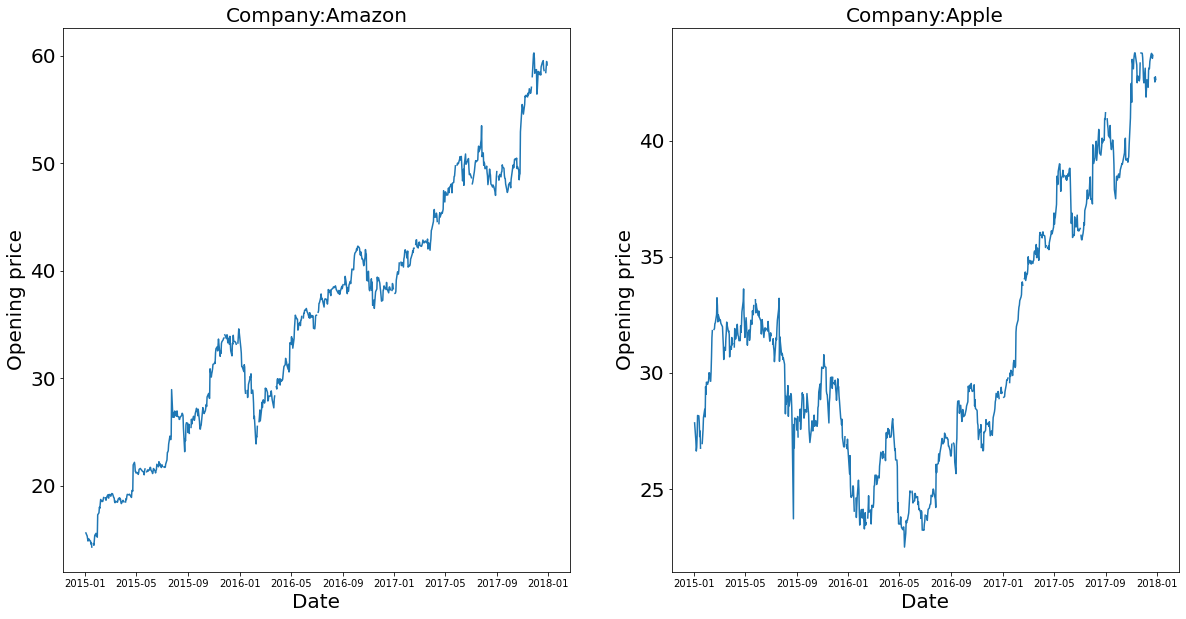

In [ ]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.subplot(1,2,1) # Subplot 1
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Opening price',fontsize = 20)
plt.plot(df['Open']['AMZN'])
plt.subplot(1,2,2) # Subplot 2
plt.title('Company:Apple',fontsize = 20) 
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Opening price',fontsize = 20)
plt.plot(df['Open']['AAPL'])

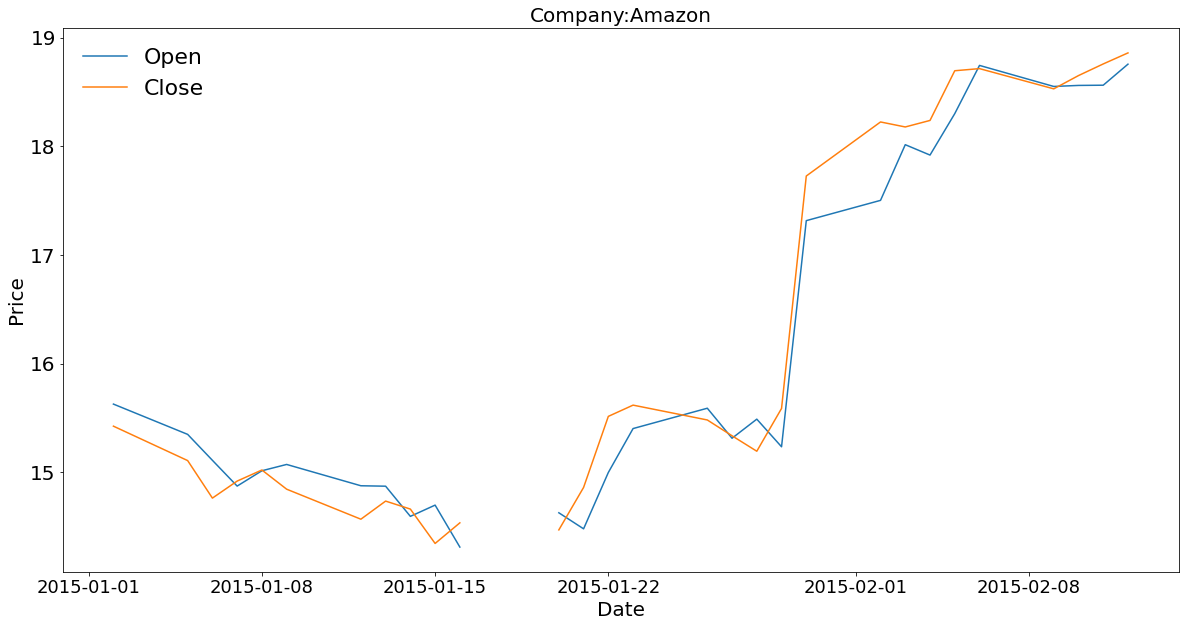

In [ ]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(df.iloc[0:30]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(df.iloc[0:30]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

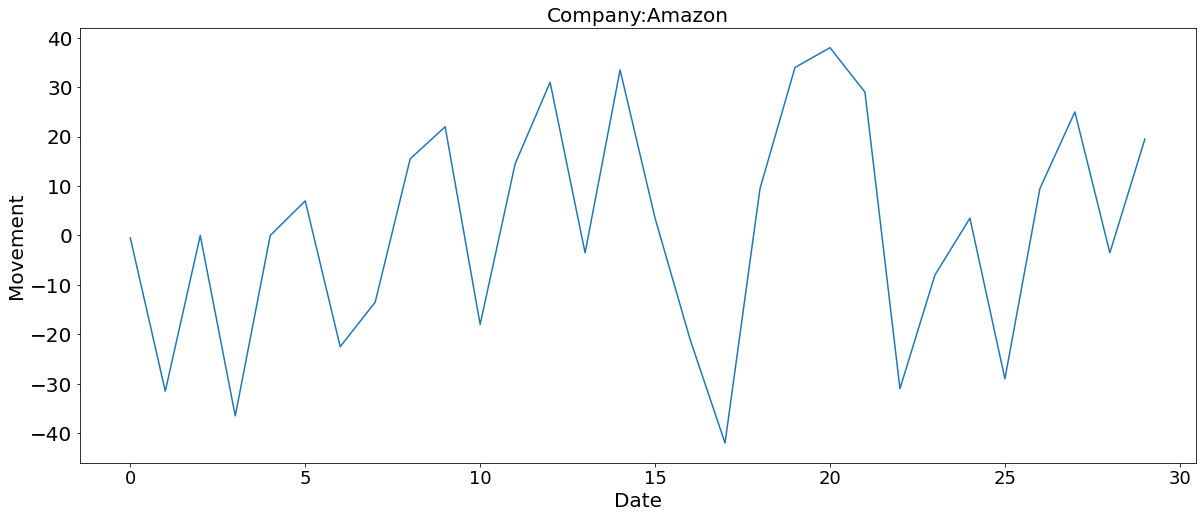

In [ ]:
plt.figure(figsize = (20,8)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30])

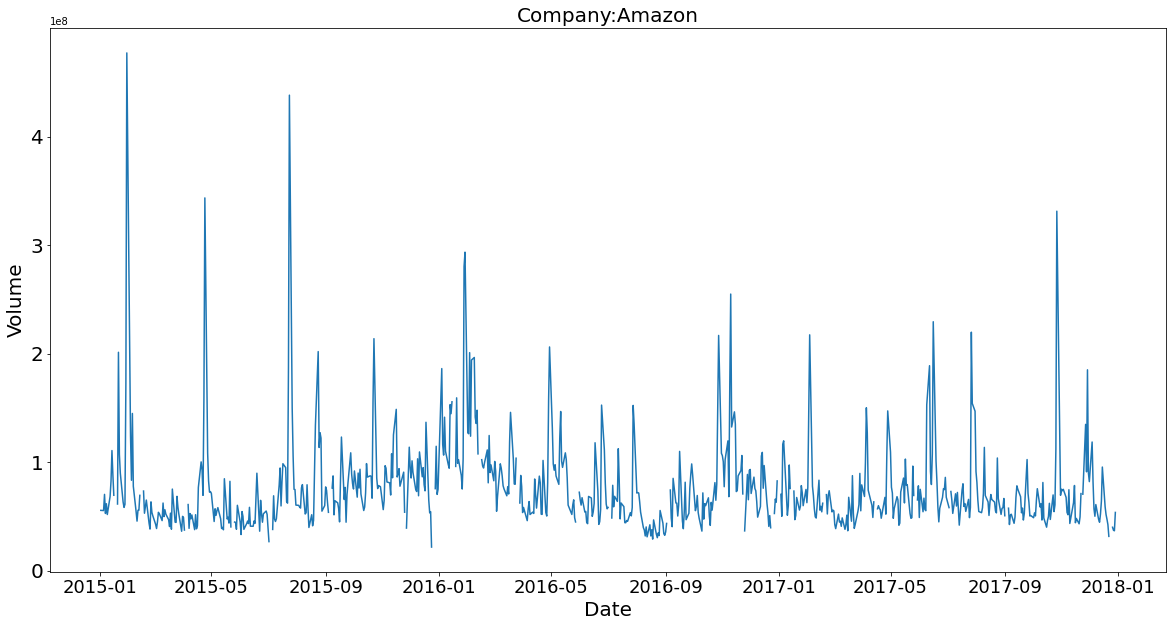

In [ ]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(df['Volume']['AMZN'],label = 'Open') # Volume prices of first 30 days are plotted against date

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df1.index,
                open=df1.iloc[0:60]['Open']['AMZN'],
                high=df1.iloc[0:60]['High']['AMZN'],
                low=df1.iloc[0:60]['Low']['AMZN'],
                close=df1.iloc[0:60]['Close']['AMZN'])])

fig.show()

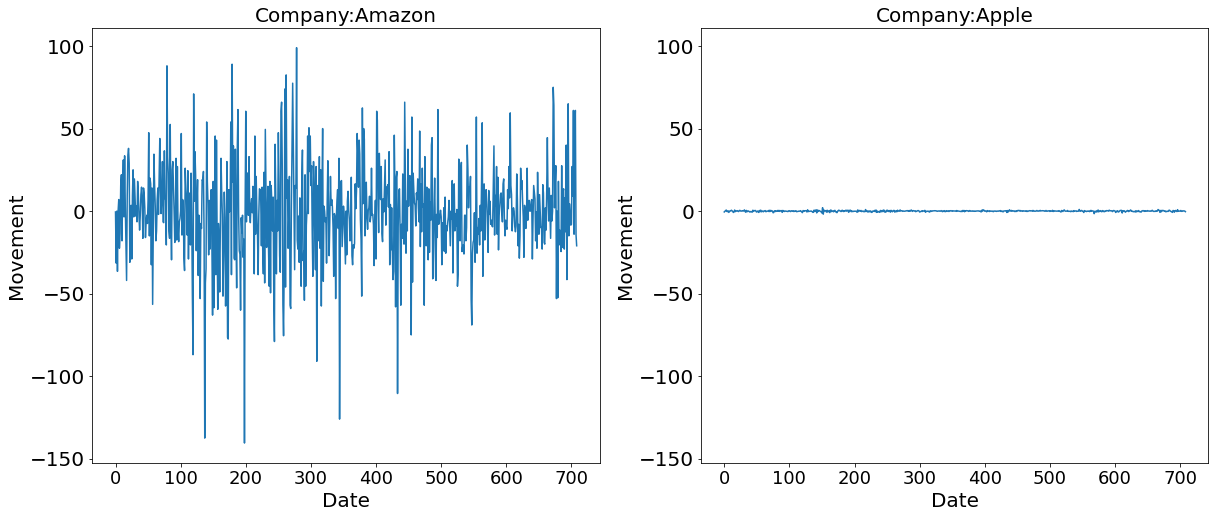

In [ ]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1]) 

In [ ]:
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform

In [ ]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.33911087022224956
0.26371982856538134
0.001107674223355213


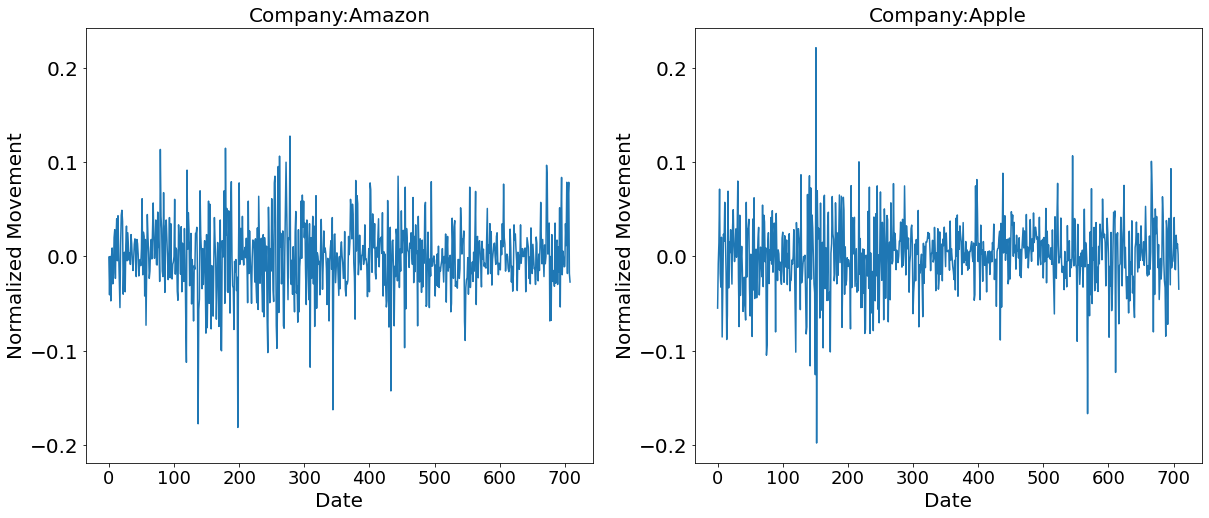

In [ ]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Normalized Movement',fontsize = 20)
plt.plot(norm_movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Normalized Movement',fontsize = 20)
plt.plot(norm_movements[1])

In [ ]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

# Define a normalizer
normalizer = Normalizer()

# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to daily stock movements
pipeline.fit(movements)

labels = pipeline.predict(movements)

In [ ]:
df2 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)
df2

,labels,companies
13,0,Symantec
19,0,Honda
22,1,Exxon
20,1,Mitsubishi
3,1,Northrop Grumman
5,1,Lockheed Martin
10,1,MasterCard
7,1,Intel
8,1,IBM
9,1,Texas Instruments


In [ ]:
kmeans.inertia_

8.841135302176086

In [ ]:
from sklearn.decomposition import PCA

# Define a normalizer
normalizer = Normalizer()

# Reduce the data
reduced_data = PCA(n_components = 2)

# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)

# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)

# Fit pipeline to daily stock movements
pipeline.fit(movements)

# Prediction
labels = pipeline.predict(movements)

# Create dataframe to store companies and predicted labels
df3 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)
df3

,labels,companies
26,0,Bank of America
6,0,McDonalds
8,0,IBM
16,1,Coca Cola
11,2,Microsoft
20,2,Mitsubishi
3,3,Northrop Grumman
24,3,Valero Energy
22,3,Exxon
9,3,Texas Instruments


<Figure size 432x288 with 0 Axes>

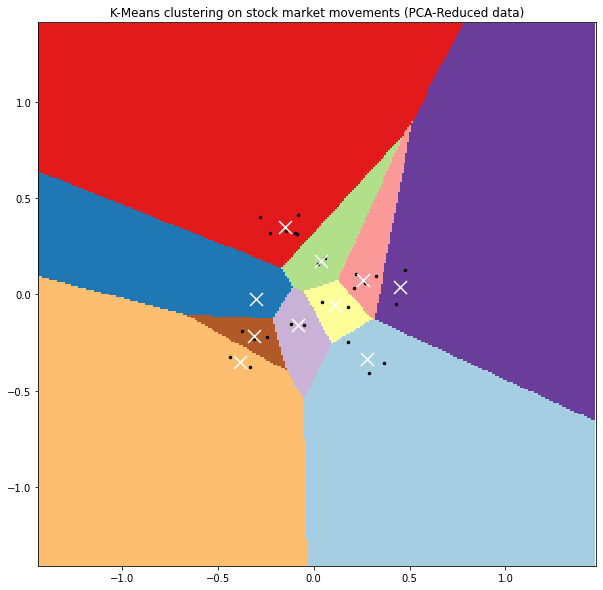

In [ ]:
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)

# Define step size of mesh
h = 0.01

# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define color plot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')


plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)

# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)

plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()